# Hourly Bitcoin Prediction using Stocker

Stocker ("stock explorer") is a Python-based toolkit adjusted for Bitcoin price prediction. It is built on the crypto_signal app for bitcoin data, the prophet library from Facebook for additive models, numpy and pandas for data manipulation, and matplotlib for visualization. 

This notebook will document some of the basic capabilities of Stocker for prediction. To see the original code for Stocker, check out stocker.py and to see a notebook with analysis examples, look at the [Stocker Analysis Usage notebook](https://github.com/WillKoehrsen/Data-Analysis/blob/master/stocker/Stocker%20Analysis%20Usage.ipynb). 

In [1]:
#Note: before launching Jupyter lab, need to export: export DJANGO_SETTINGS_MODULE=crypto_signal.settings
import django
django.setup()
# Matplotlib for plotting in the notebook
import matplotlib.pyplot as plt

## Import the Stocker Class

In [2]:
from crypto_track.stocker import Stocker

### Instantiate a Stocker object 

We will be looking at Bitcoin data throughout this example. To retrieve the data, we pass the ticker and hourly interval to the stocker class, and assign it to a variable. 

In [3]:
bitcoin = Stocker('BTC', period_interval='1h')

Prophet Initialized. Data covers 2019-01-30 to 2019-03-04.
BTC Stocker Initialized. Data covers 2019-01-30 to 2019-03-04.


In [4]:
bitcoin.stock.head()

,crypto_traded,currency_quoted,data_source,id,period_close,period_high,period_interval,period_low,period_open,period_start_timestamp,period_volume,search_trend_id,update_timestamp,Date,ds,y,Daily Change
0,BTC,USD,Nomics https://api.nomics.com/v1/candles,4262,3459.15175,3467.8936400000,1h,3457.5312300000,3467.36009,2019-01-30T19:00:00Z,12148548.0,27012,2019-03-01 18:58:51.569007+00:00,2019-01-30 19:00:00,2019-01-30 19:00:00,3459.15175,-8.20834
1,BTC,USD,Nomics https://api.nomics.com/v1/candles,4263,3451.46144,3452.2743000000,1h,3447.7767100000,3451.33251,2019-01-30T20:00:00Z,12463999.0,27013,2019-03-01 18:58:51.574127+00:00,2019-01-30 20:00:00,2019-01-30 20:00:00,3451.46144,0.12893
2,BTC,USD,Nomics https://api.nomics.com/v1/candles,4264,3441.62477,3443.3346500000,1h,3440.7713800000,3443.33465,2019-01-30T21:00:00Z,10376069.0,27014,2019-03-01 18:58:51.581549+00:00,2019-01-30 21:00:00,2019-01-30 21:00:00,3441.62477,-1.70988
3,BTC,USD,Nomics https://api.nomics.com/v1/candles,4265,3454.90698,3455.8434100000,1h,3448.0290900000,3448.02909,2019-01-30T22:00:00Z,8981538.0,27015,2019-03-01 18:58:51.588192+00:00,2019-01-30 22:00:00,2019-01-30 22:00:00,3454.90698,6.87789
4,BTC,USD,Nomics https://api.nomics.com/v1/candles,4266,3467.83709,3473.8826200000,1h,3461.0206200000,3473.88262,2019-01-30T23:00:00Z,12965705.0,27016,2019-03-01 18:58:51.594795+00:00,2019-01-30 23:00:00,2019-01-30 23:00:00,3467.83709,-6.04553


In [20]:
start = '2019-02-28'
end = '2019-03-04'
# Note that training_years in this case is actually weeks
bitcoin.training_years=5

When the model predicted an increase, the price increased 51.22% of the time.
When the model predicted a  decrease, the price decreased  56.36% of the time.

You played the stock market in BTC from 2019-02-28 to 2019-03-04 with 100 shares.

The total profit using the Prophet model = $-3000.04.
The Buy and Hold strategy profit =         $-1141.28.

Thanks for playing the stock market!



/Users/lauramay/Documents/GitHub/crypto_signal/crypto_signal/crypto_track/stocker.py:952: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  test_pred_increase['pred_profit'] = prediction_profit


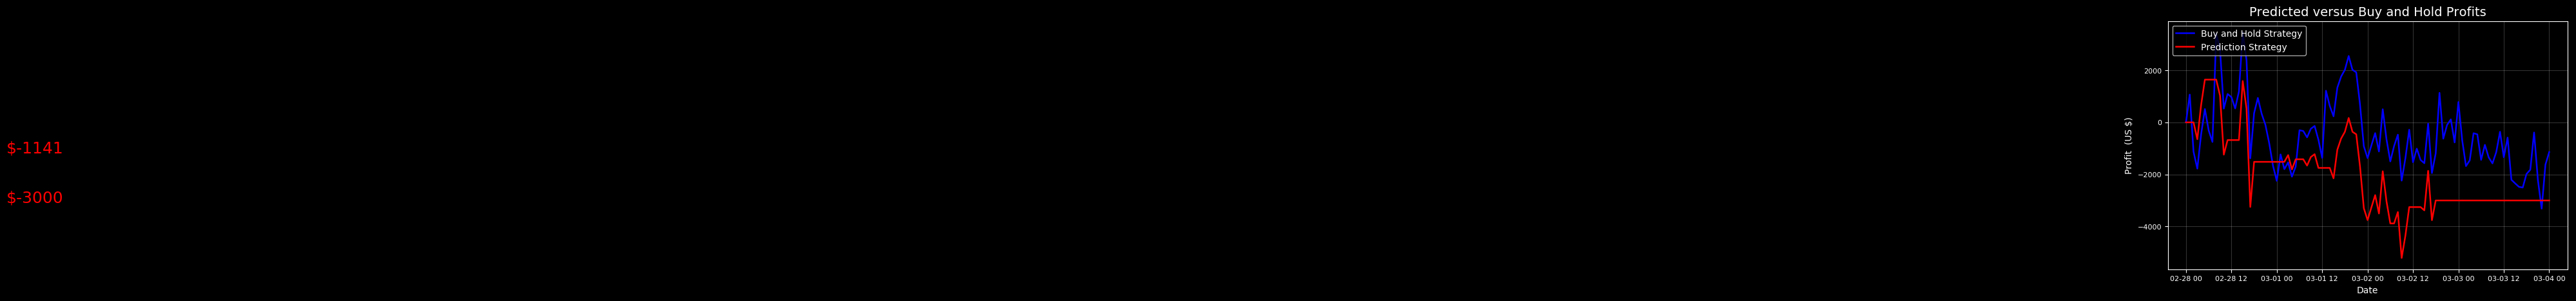

In [21]:
bitcoin.evaluate_prediction(start_date=start, end_date=end, nshares=100)

The Stocker object has a number of attributes and methods we can use for analysis and prediction. The main methods we will use in this notebook are `Stocker.create_prophet_model(), Stocker.changepoint_prior_analysis(), Stocker.changepoint_prior_validation(), Stocker.evaluate_prediction(),` and `Stocker.predict_future()`.

The most critical attributes for a forecast are `Stocker.changepoint_prior_scale, Stocker.training_years`, and the seasonalities included in the model. 

### Basic Plot of Stock History

We have a little over one month of bitcoin hourly price history. Let's see what that looks like in its entirety.

Maximum period_close = 4189.12 on 2019-02-24.
Minimum period_close = 3373.34 on 2019-02-08.
Current period_close = 3736.69 on 2019-03-04.



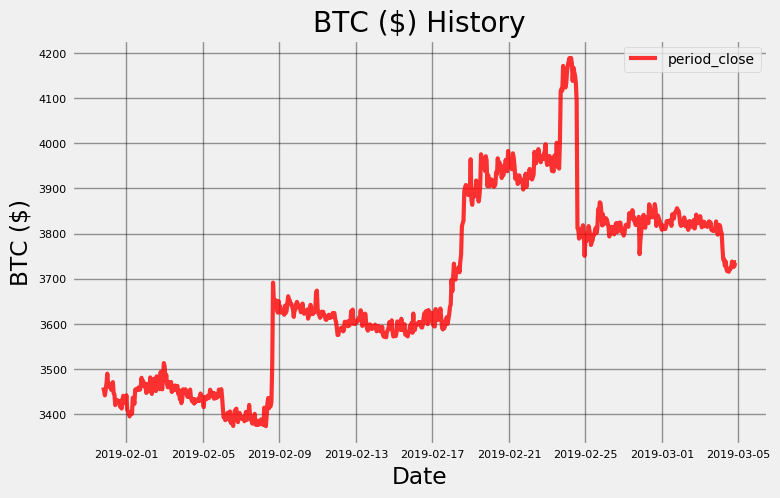

In [7]:
bitcoin.plot_chart(stats=['period_close'])

Looks predictable right? 

### Plot of Hourly Changes

Maximum Daily Change = 156.70 on 2019-02-08.
Minimum Daily Change = -153.11 on 2019-02-24.
Current Daily Change = 1.23 on 2019-03-04.



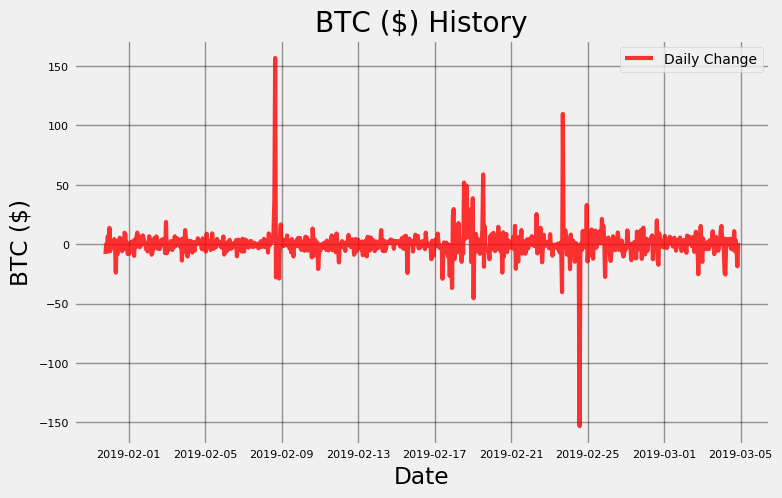

In [8]:
bitcoin.plot_chart(stats=['Daily Change'])

## Examine Trends/Patterns

We can create a basic model (with no predictions) trained on the past month of data to inspect any trends and patterns in the data. 

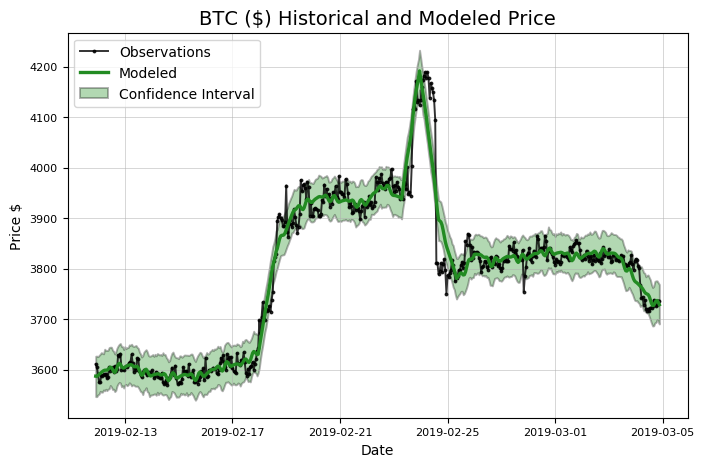

In [22]:
model, model_data = bitcoin.create_prophet_model()

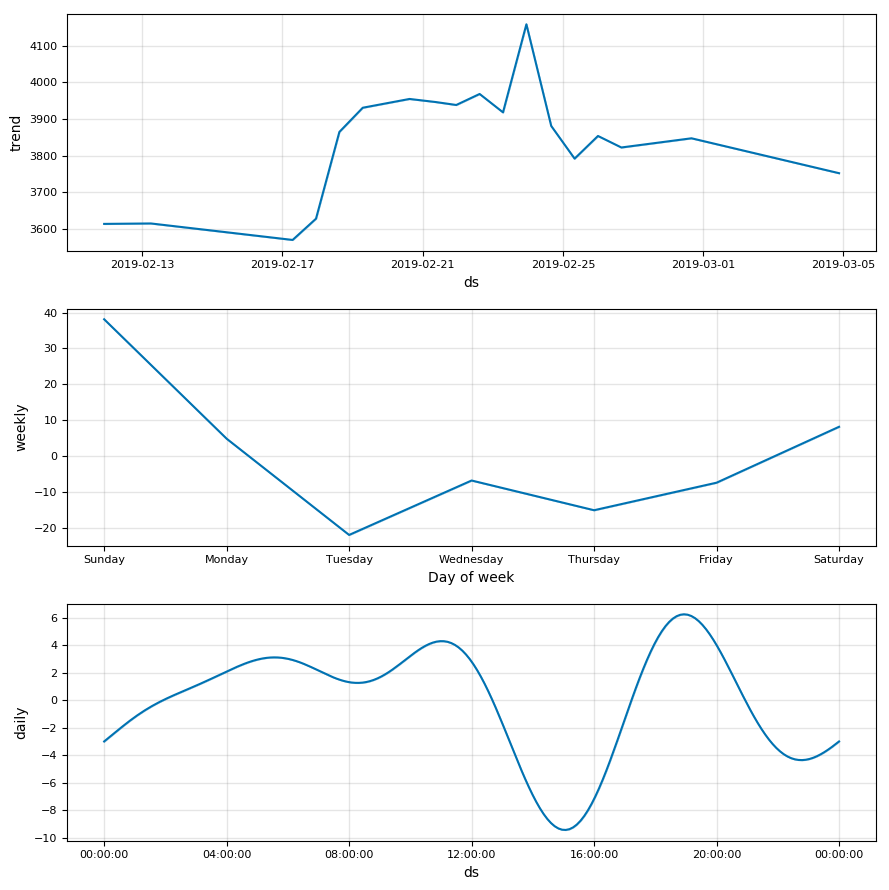

In [23]:
# Variables assigned from previous method call
model.plot_components(model_data)
plt.show()

### Test Addition of a Weekly and Daily Seasonality

This code defaults settings for daily prediction, we are going to modify seasonality factors for hourly prediction. This should improve the model. Let's add it in and look at the pattern. 

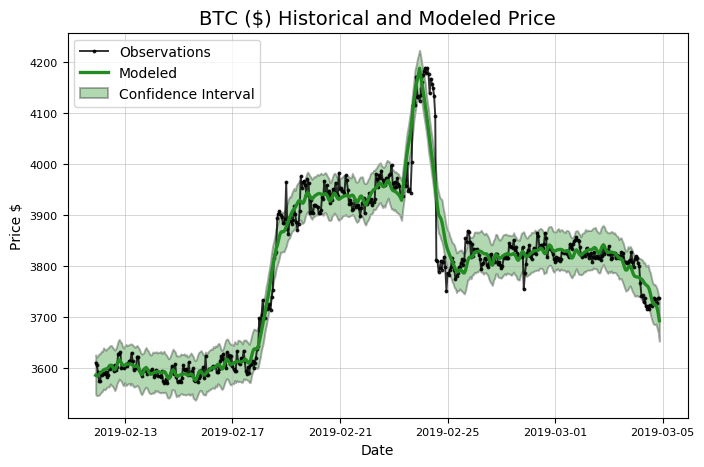

In [24]:
bitcoin.yearly_seasonality=False
bitcoin.monthly_seasonality=True
bitcoin.weekly_seasonality=True
bitcoin.daily_seasonality=True
model, model_data = bitcoin.create_prophet_model()

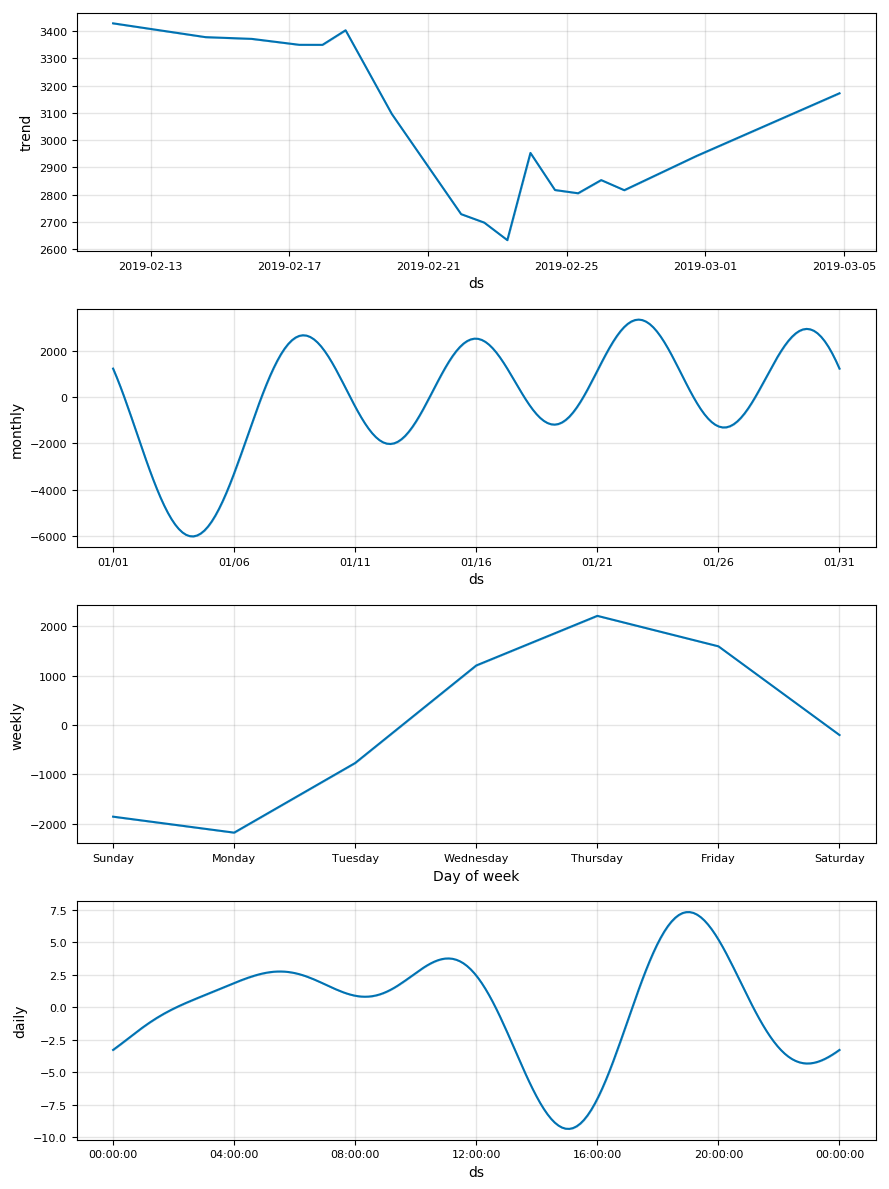

In [25]:
model.plot_components(model_data)
plt.show()

We will keep weekly seasonality as we see a clear dip on Mondays and spike on Thursdays. Also daily looks like it spikes between the hours of 16-20h. We do not have enough data for yearly or monthly seasonality.

In [26]:
bitcoin.monthly_seasonality=False

# First Predictions

We can make a prediction for any number of specified days using the create model method. The prediction also includes the uncertainty interval, a necessity when making estimates about the future! 

Predicted Value on 2019-03-05 = $3726.34


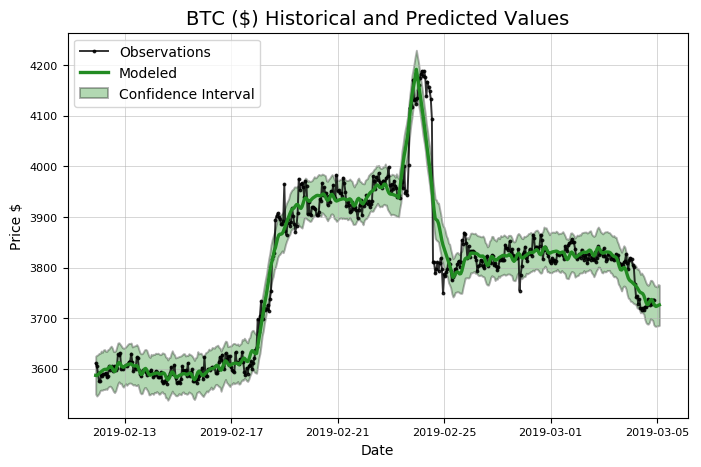

In [27]:
model, model_data = bitcoin.create_prophet_model(days=5)

# Evaluate Model

Anyone can make stock predictions by simply picking a number. For our predictions to be meaningful, we must evaluate them on real data. 

One way to do this is set aside some historical data as a test set and use data from further back as our training set. In the default evaluation method, we test using the past week and train on the 4 weeks prior to the test period. 

To quantify the accuracy of our predictions, we can find the average dollar error on both the testing and training data, the percentage the actual price was in the predicted confidence interval, and the percentage of times we predicted the correct direction for the stock. 

When the model predicted an increase, the price increased 46.27% of the time.
When the model predicted a  decrease, the price decreased  53.25% of the time.


Prediction Range: 2019-02-26 to 2019-03-04.

Predicted value on 2019-03-13 = $3652.14.
Actual value on    2019-03-04 = $3819.34.

Average Absolute Error on Training Data = $25.59.
Average Absolute Error on Testing  Data = $49.13.

The actual value was within the 80% confidence interval 100.00% of the time.


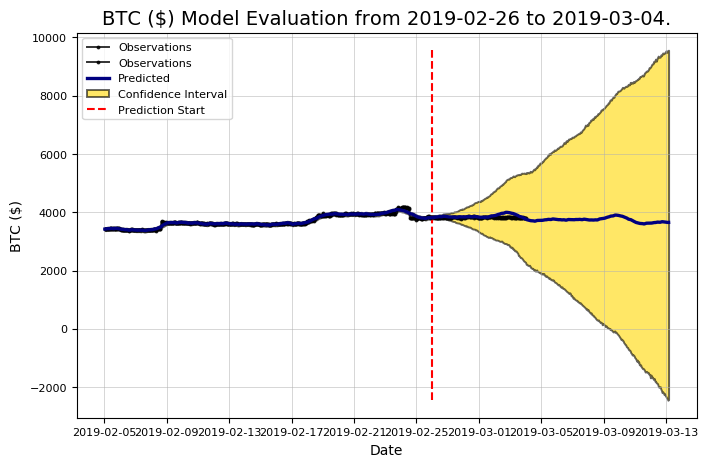

In [29]:
bitcoin.evaluate_prediction(start_date='2019-02-26', end_date='2019-03-04')

These predictions are not very good! However, it is likely that the model hyperparameters (settings) are not optimized for our problem. There are a number of these knobs we can adjust to improve the model, with perhaps the most important the changepoint prior scale, or the amount of weight the model assigns to shifts in the data.

# Changepoint Prior Scale Selection

Changepoints represent where a time series goes from increasing to decreasing or from increasing slowly to increasingly rapidly. They occur at the places with the [greatest change in the rate of the time series](https://facebook.github.io/prophet/docs/trend_changepoints.html). 

The changepoint prior scale represents the amount of weight given to the changepoints in the model. This can be used to control overfitting vs underfitting. A higher prior will create a model with more flexibility and more emphasis on the changepoints. This can lead to overfitting because the model will closely follow the training data. Lowering the prior decreases the model flexibility which can cause the opposite problem underfitting. This occurs when our model does not follow the training data closely enough and fails to learn the underlying relationships.

The Stocker class contains two different ways to choose an appropriate prior: grahically and quantitatively with validation data.

## Graphical Comparison

We will start with a range of four priors to compare. First, we can graphically compare them to get an intuition of how the priors affect the model.  

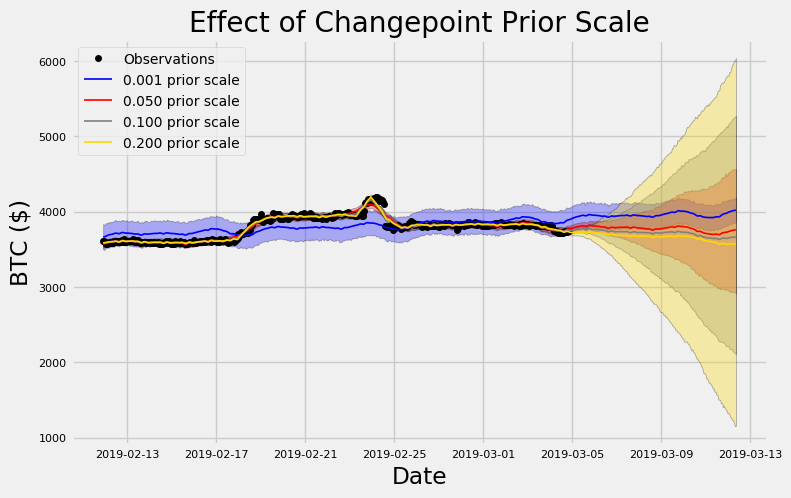

In [30]:
bitcoin.changepoint_prior_analysis(changepoint_priors=[0.001, 0.05, 0.1, 0.2])

## Quantitative Comparison

This gives us an idea of how well each prior fits the training data, but no numbers to back up our intuitions. The changepoint prior validation method is designed to provide numerical backing. We are testing from 2019-02-26 to 2019-03-04, so we need to make sure to use a different validation range. We will select one week prior to the testing date range. The model will be trained on the three weeks prior to the validation period.

/Users/lauramay/Documents/GitHub/crypto_signal/env/lib/python3.7/site-packages/pandas/core/frame.py:406: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  elif isinstance(data, collections.Iterator):



Validation Range 2019-02-19 to 2019-02-25.

     cps  train_err  train_range    test_err  test_range
0  0.001  50.156887   154.876484  199.511854  157.139425
1  0.050  13.732979    50.532100   38.127576   52.980403
2  0.100  12.556525    46.789105   59.886623   47.803909
3  0.200  12.102808    45.110251   74.291637   46.945037


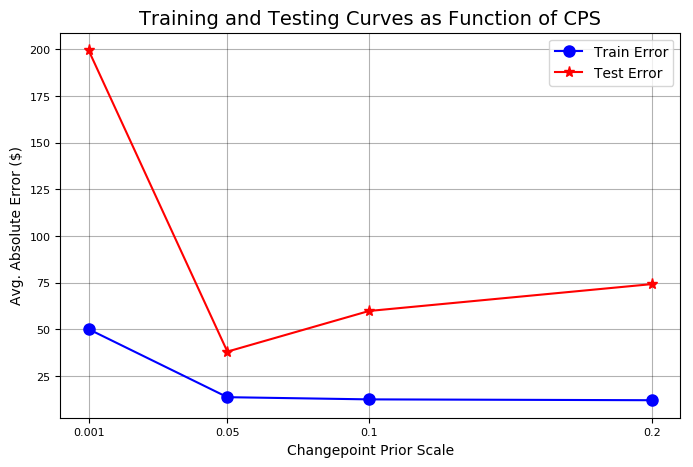

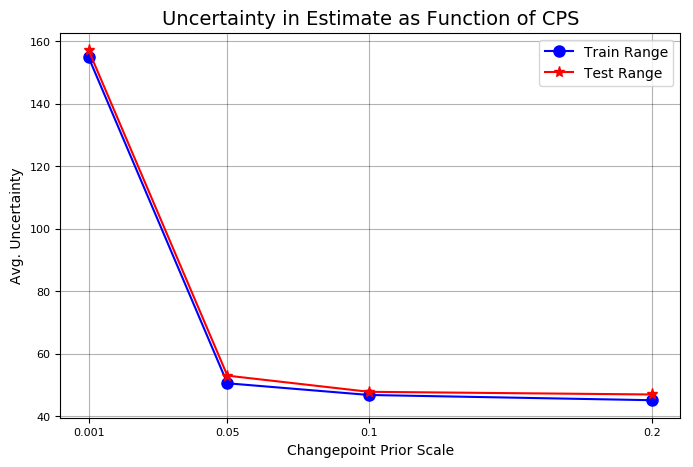

In [31]:
bitcoin.changepoint_prior_validation(start_date='2019-02-19', end_date='2019-02-25', changepoint_priors=[0.001, 0.05, 0.1, 0.2])

The test error decreases as we increase the prior. Like stocks, cryptocurrency exchange rates change considerably on a day to day basis, and a more flexible model can account for these fluctuations.

### Refine Search 

We can evaluate additional changepoint prior scales to determine the best fit for our data. 


Validation Range 2019-02-19 to 2019-02-25.

    cps  train_err  train_range   test_err  test_range
0  0.05  13.732979    50.587710  38.127576   51.315930
1  0.15  12.299260    45.867858  68.203071   47.910137
2  0.20  12.102808    45.189295  74.291637   47.452727
3  0.40  11.932253    44.725687  76.173713   47.016696
4  0.50  11.911151    44.626500  76.250723   46.350408
5  0.60  11.898763    44.503260  76.297638   46.949448


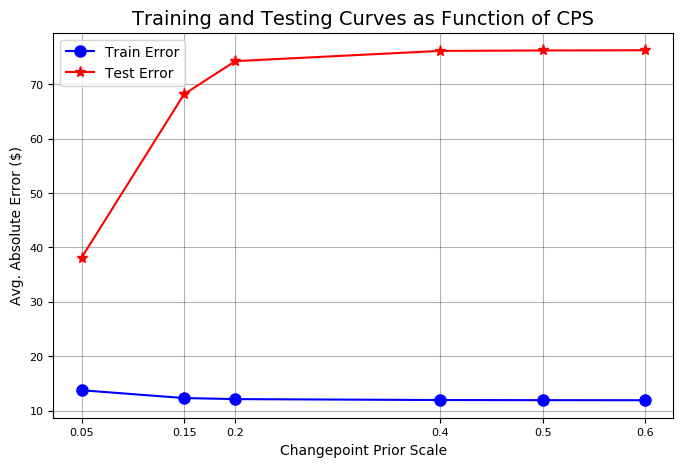

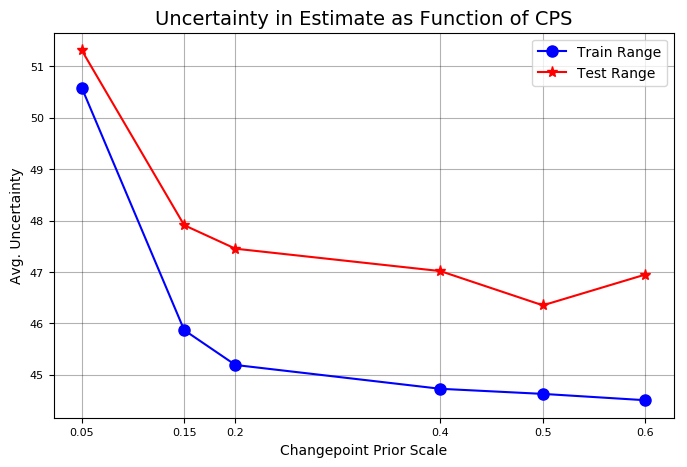

In [32]:
bitcoin.changepoint_prior_validation(start_date='2019-02-19', end_date='2019-02-25', changepoint_priors=[0.05, 0.15, 0.2, 0.4, 0.5, 0.6])

We now assign the changepoint prior with the smallest error on the testing set to the bitcoin object. The prior is one of the attiributes and we can change it like any other variable. At this point, we could also change the seasonalities or the amount of training data to achieve the best performance on the testing data

### Evaluate Improved Model

Evaluating model with 0.5 changepoint because it had the lowest test error and uncertainty range.

When the model predicted an increase, the price increased 51.43% of the time.
When the model predicted a  decrease, the price decreased  55.74% of the time.


Prediction Range: 2019-02-28 to 2019-03-04.

Predicted value on 2019-03-15 = $3228.67.
Actual value on    2019-03-04 = $3819.34.

Average Absolute Error on Training Data = $28.44.
Average Absolute Error on Testing  Data = $57.24.

The actual value was within the 80% confidence interval 94.85% of the time.


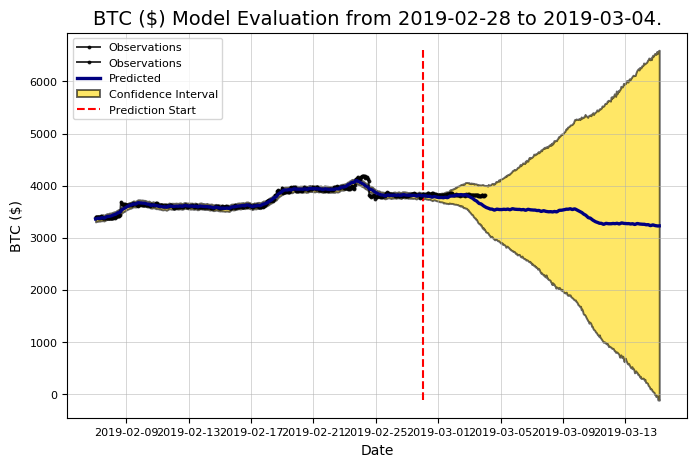

In [33]:
bitcoin.changepoint_prior_scale = 0.1
bitcoin.evaluate_prediction(start_date=start, end_date=end)

It looks like we have less than a 50/50 chance to predict a price increase or decrease.

#### Evaluate higher changepoint
We are now going to try 0.4 changepoint because the absolute error is relatively similar, and for crypto_signal app we are trying to predict whether the price will increase or decrease, so we would like to get higher than 50% chance.

When the model predicted an increase, the price increased 48.48% of the time.
When the model predicted a  decrease, the price decreased  53.97% of the time.


Prediction Range: 2019-02-28 to 2019-03-04.

Predicted value on 2019-03-15 = $3173.00.
Actual value on    2019-03-04 = $3819.34.

Average Absolute Error on Training Data = $31.66.
Average Absolute Error on Testing  Data = $89.12.

The actual value was within the 80% confidence interval 59.79% of the time.


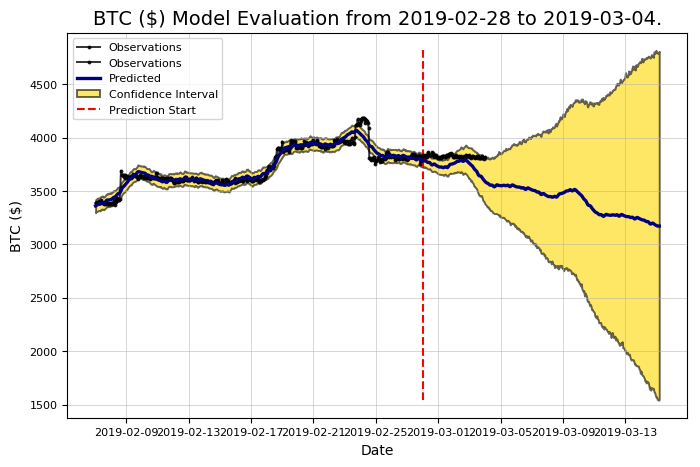

In [35]:
bitcoin.changepoint_prior_scale=0.05
bitcoin.evaluate_prediction(start_date=start, end_date=end)

We are deciding the best changepoint prior scale for our model is 0.1 because we are better predicting an increase/decrease (although not a great prediction!). We are also keeping all of the seasonality settings.

In [42]:
bitcoin.changepoint_prior_scale=0.1

## Play the Daily Market

For fun (this should never be done for real) we can "play" the market with our predictions. We will compare our model with the simple strategy of buying and holding over the same time period. The rules of our game are straightforward:

1. If we predict the price will increase, we buy stock on that day. If we predict a decrease, we do not play the market.
2. If we predicted an increase and the stock does increase, we recieve the change in price of the stock over that day times the number of shares.
3. If we predicted an increase and the stock decreases, we lose the change in price of the stock over that day times the number of shares.

We are assuming the "change in price of a share on that day" is the difference between the previous days' closing price and the closing price on our day. For example, if the closing price on Monday was \$14 and the closing price on Tuesday was \$18, we would call that a \$4 change on Tuesday. This is not entirely accurate as stocks prices change a small amount overnight, but it will be acceptable for our game. Now, let's play with the defaults.

When the model predicted an increase, the price increased 51.43% of the time.
When the model predicted a  decrease, the price decreased  55.74% of the time.

You played the stock market in BTC from 2019-02-28 to 2019-03-04 with 1000 shares.

The total profit using the Prophet model = $-51870.63.
The Buy and Hold strategy profit =         $-11412.85.

Thanks for playing the stock market!



/Users/lauramay/Documents/GitHub/crypto_signal/crypto_signal/crypto_track/stocker.py:952: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  test_pred_increase['pred_profit'] = prediction_profit


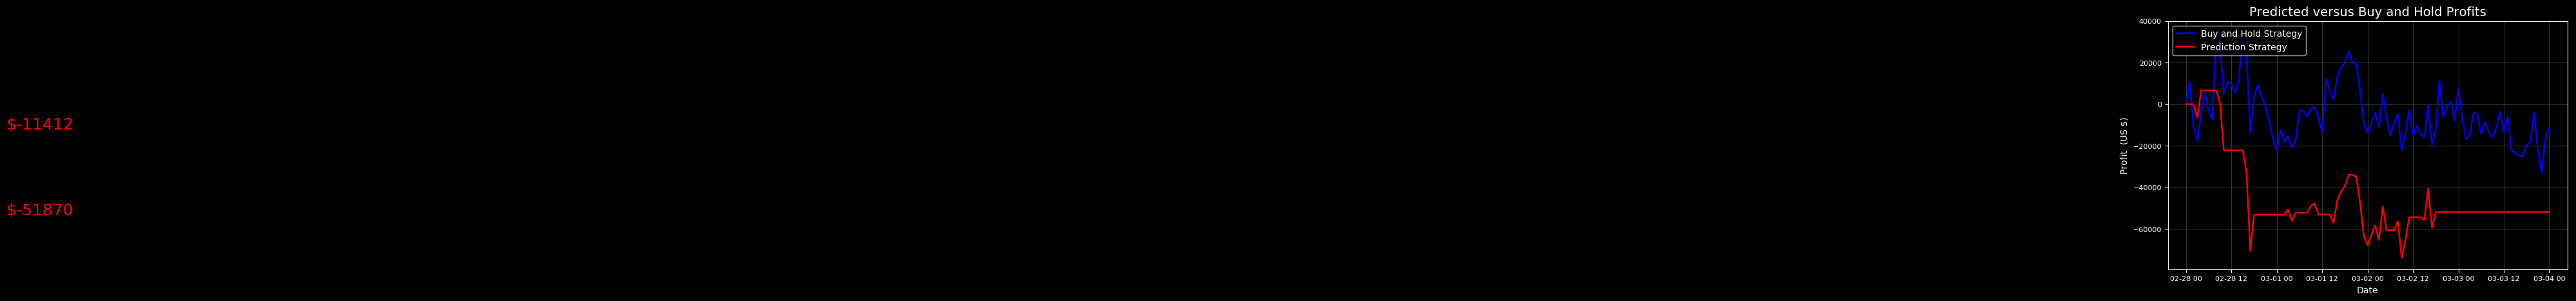

In [43]:
bitcoin.evaluate_prediction(start_date=start, end_date=end, nshares=1000)

Notice that our profits do not depend on the difference between the final predicted price and the actual price, only on the percentage of the time we correctly predicted the direction. We could alter the rules of the game to play it based on predicted values, but for now we can leave it at the rather simple exercise shown here. 

#### Try a Different Period

We can evaluate any time period we like to see if there are times when we beat the buy and hold strategy. More likely is that we will find times when we lose money. Nonetheless, it is important to test over different time frames to see how robust the model is to training data.

When the model predicted an increase, the price increased 44.92% of the time.
When the model predicted a  decrease, the price decreased  44.00% of the time.

You played the stock market in BTC from 2019-02-20 to 2019-02-27 with 1000 shares.

The total profit using the Prophet model = $-240289.70.
The Buy and Hold strategy profit =         $-109410.73.

Thanks for playing the stock market!



/Users/lauramay/Documents/GitHub/crypto_signal/crypto_signal/crypto_track/stocker.py:952: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  test_pred_increase['pred_profit'] = prediction_profit


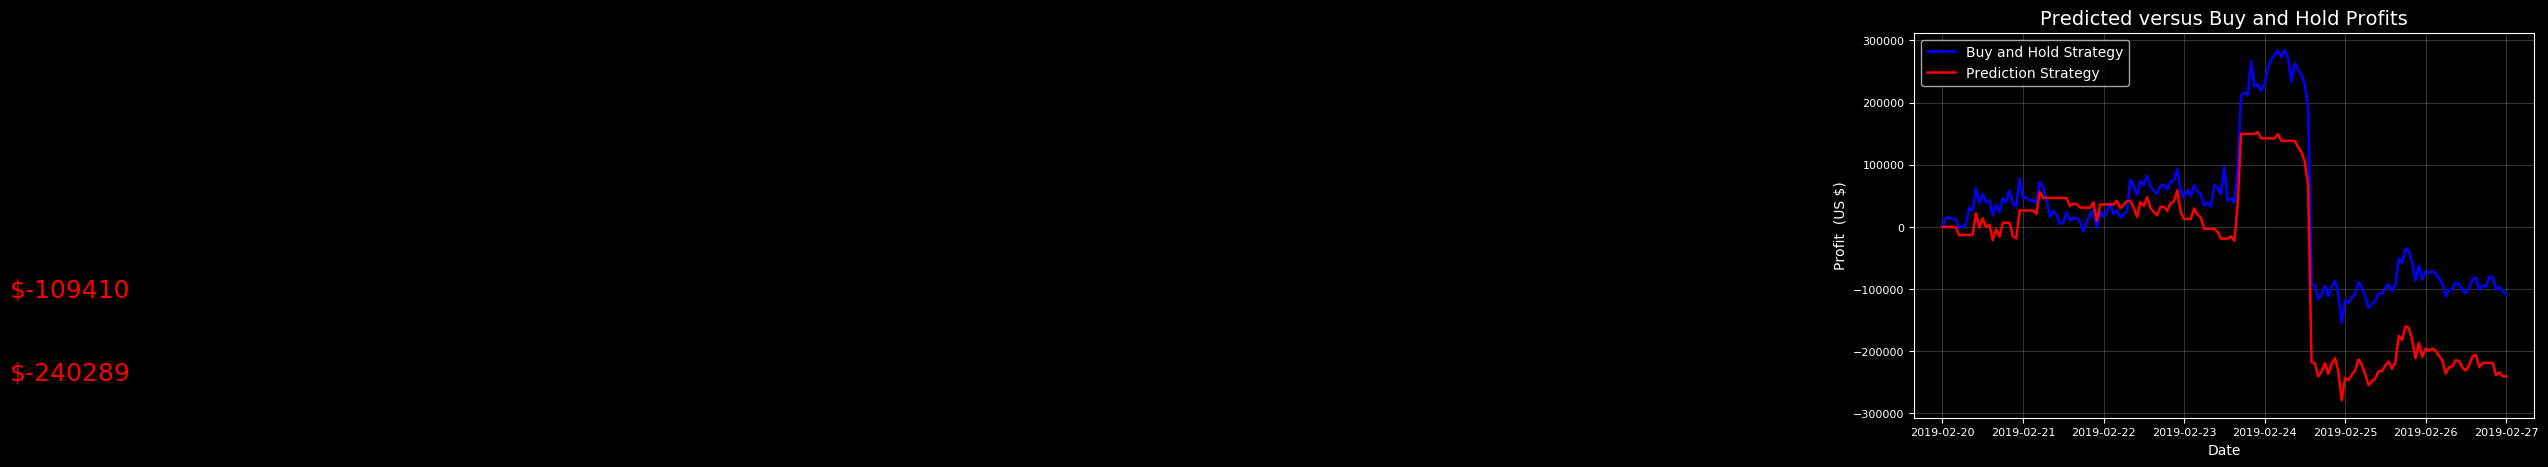

In [44]:
bitcoin.evaluate_prediction(start_date = '2019-02-20', end_date = '2019-02-27', nshares=1000)

# Predict the Future

As a last step, we can predict any number of days into the future. This function automatically trains on the past 3 years and makes predictions with the uncertainty intervals. 


Predicted Increase: 

                   Date     estimate    change        upper        lower
505 2019-03-04 23:00:00  3751.937452  1.062527  3793.909773  3707.889937
506 2019-03-05 00:00:00  3754.711736  2.774285  3797.151588  3712.228665
507 2019-03-05 01:00:00  3757.673867  2.962130  3801.057533  3716.393647
508 2019-03-05 02:00:00  3760.054078  2.380211  3800.879909  3715.758924

Predicted Decrease: 

                   Date     estimate    change        upper        lower
503 2019-03-04 21:00:00  3752.287342 -2.605537  3792.980166  3708.429073
504 2019-03-04 22:00:00  3750.874925 -1.412417  3793.475992  3707.803342


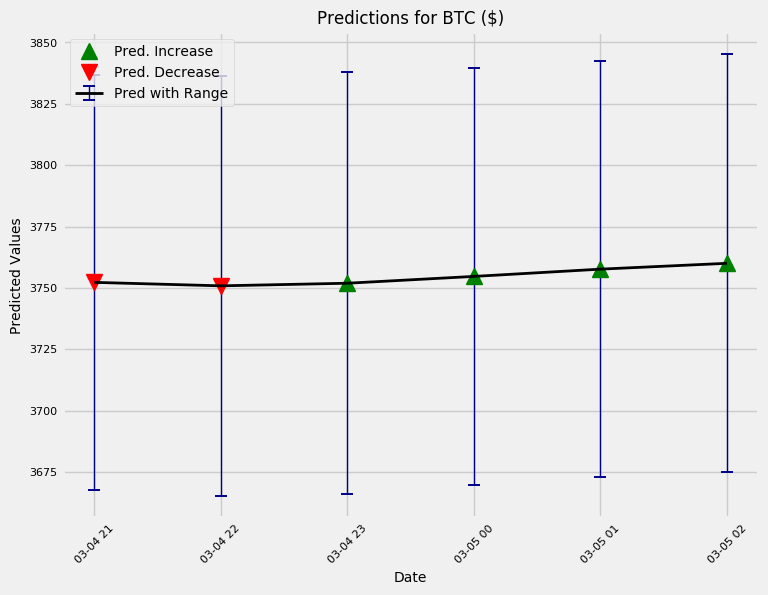

In [45]:
bitcoin.predict_future(days=5);

In [ ]:
bitcoin.predict_future(days=10);

The uncertainty increases the farther out in the future we predict. This is to be expected because the initial forecasted values have some uncertainty, and the next values are made based on the previous ones, so the range of possible values grows over time. 

Whenever we make a prediction, we must be sure to include uncertainty intervals because there are no processes that can be exactly estimated in the future. While most people interpret a confidence interval as a lack of confidence, it really displays that we know the limitations of our model. 